# 1. Dataset Overview and Source

For this assignment, we are working with a **housing dataset** (train_housing.csv). The dataset includes features such as:
- **price** (target variable)
- **bedrooms**, **bathrooms**, **sqft_living**, **sqft_lot**, **floors**, etc.
- Additional features like **yr_built**, **yr_renovated**, etc.

The goal is a **regression** task where we predict the house price (`price`) based on the other available features.

**Dataset Link** (example source):
[Housing Prices Dataset](https://www.kaggle.com/datasets/fratzcan/usa-house-prices?resource=download)  


We will build a **Neural Network from scratch** using only NumPy and Pandas (no high-level Deep Learning frameworks like TensorFlow/PyTorch). We will:
1. Load and preprocess the data.
2. Implement forward propagation, backward propagation, and gradient descent.
3. Train and evaluate our model.

In [4]:
import pandas as pd
import numpy as np

# 1. Load the dataset
# Replace 'train_housing.csv' with the actual path if needed
df = pd.read_csv('housing_train.csv')

# 2. Examine the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# 3. Basic info
print("\nDataset Info:")
df.info()

# 4. Statistical summary
print("\nStatistical Description:")
display(df.describe(include='all'))

# 5. Check for missing values
print("\nNumber of missing values per column:")
print(df.isnull().sum())

First 5 rows of the dataset:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4140,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140,4140,4140,4140
unique,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4079,43,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1415,128,4140
mean,NaN,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357,NaN,NaN,NaN,NaN
std,NaN,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000,NaN,NaN,NaN,NaN



Number of missing values per column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


# 2. Data Cleaning & Preprocessing

In this step, we will:
1. Drop or convert columns that are non-numerical or not relevant for the neural network (e.g., date, street, city, etc.) unless we plan to encode them.
2. Handle any missing values (e.g., drop or fill).
3. Create our feature matrix `X` and target vector `y`.
4. Split into train/test sets.


In [18]:
drop_cols = ['date', 'street', 'city', 'statezip', 'country']  # Example
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Check the remaining columns
print("Remaining columns:")
print(df.columns)


df.dropna(inplace=True)

# Shuffle the data (optional, for random distribution)
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)

# Separate features (X) and target (y)
y = df['price'].values.reshape(-1, 1)
X = df.drop(columns=['price']).values

# Train/Test Split
train_ratio = 0.8
train_size = int(train_ratio * len(X))

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

# Here, we do a simple min-max scaling:
X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)

X_train = (X_train - X_min) / (X_max - X_min + 1e-8)
X_test  = (X_test  - X_min) / (X_max - X_min + 1e-8)

print("\nShapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:",  X_test.shape)
print("y_test:",  y_test.shape)

Remaining columns:
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

Shapes:
X_train: (3312, 12)
y_train: (3312, 1)
X_test: (828, 12)
y_test: (828, 1)


# 3. Neural Network from Scratch – Outline & Key Equations

We will implement a basic feedforward neural network with:
- One or more hidden layers (e.g., a single hidden layer for illustration).
- **Forward Propagation**:
  $$
  Z^{[l]} = A^{[l-1]} W^{[l]} + b^{[l]},
  \quad
  A^{[l]} = \sigma(Z^{[l]})
  $$
  For the final layer (regression), we use a linear output (no activation or identity activation).

- **Cost Function** (Mean Squared Error, MSE):
  $$
  J = \frac{1}{n}\sum_{i=1}^n (\hat{y}_i - y_i)^2
  $$

- **Backward Propagation**:  
  Compute partial derivatives of the cost \( J \) w.r.t. each \( W^{[l]} \) and \( b^{[l]} \).

- **Gradient Descent Update**:
  $$
  W^{[l]} \leftarrow W^{[l]} - \eta \, \frac{\partial J}{\partial W^{[l]}},
  \quad
  b^{[l]} \leftarrow b^{[l]} - \eta \, \frac{\partial J}{\partial b^{[l]}}
  $$
  We will implement **batch, mini-batch, or stochastic** gradient descent as needed.

We'll define a `NeuralNetwork` class with the methods:
1. `__init__`
2. `forward_propagation`
3. `backward_propagation`
4. `train` (which includes gradient descent)
5. `compute_cost`
6. `predict`

In [6]:
import numpy as np

class NeuralNetwork:
    def __init__(self, layer_dims, activation='relu', learning_rate=0.01):
        """
        Initialize the neural network parameters.

        Args:
            layer_dims (list): Dimensions of each layer. Example: [d, h, 1]
            activation (str): Activation function for hidden layers ('relu' or 'sigmoid')
            learning_rate (float): Step size for gradient descent
        """
        self.layer_dims = layer_dims
        self.activation = activation
        self.lr = learning_rate
        self.parameters = {}

        # Parameter initialization (He initialization for ReLU)
        np.random.seed(42)
        for l in range(1, len(layer_dims)):
            self.parameters[f"W{l}"] = np.random.randn(layer_dims[l-1], layer_dims[l]) * np.sqrt(2.0 / layer_dims[l-1])
            self.parameters[f"b{l}"] = np.zeros((1, layer_dims[l]))

    def _relu(self, Z):
        return np.maximum(0, Z)

    def _relu_derivative(self, Z):
        return (Z > 0).astype(float)

    def _sigmoid(self, Z):
        return 1.0 / (1.0 + np.exp(-Z))

    def _sigmoid_derivative(self, A):
        return A * (1 - A)

    def forward_propagation(self, X):
        """
        Forward pass through the network.

        Returns:
          caches (dict): Intermediate values (Z, A) for each layer.
          A_last: Final output
        """
        caches = {}
        A = X
        caches["A0"] = A

        L = len(self.layer_dims) - 1  # number of layers (excluding input)

        # Forward for hidden layers
        for l in range(1, L):
            W = self.parameters[f"W{l}"]
            b = self.parameters[f"b{l}"]
            Z = A.dot(W) + b
            caches[f"Z{l}"] = Z

            if self.activation == 'relu':
                A = self._relu(Z)
            elif self.activation == 'sigmoid':
                A = self._sigmoid(Z)
            else:
                raise ValueError("Unknown activation function.")

            caches[f"A{l}"] = A

        # Output layer: linear activation for regression
        W = self.parameters[f"W{L}"]
        b = self.parameters[f"b{L}"]
        Z = A.dot(W) + b
        caches[f"Z{L}"] = Z
        A_last = Z  # linear output
        caches[f"A{L}"] = A_last

        return caches, A_last

    def compute_cost(self, A_last, Y):
        """
        Mean Squared Error (MSE) cost.
        """
        m = Y.shape[0]
        cost = (1.0 / m) * np.sum((A_last - Y) ** 2)
        return cost

    def backward_propagation(self, caches, Y):
        """
        Compute gradients using backpropagation.

        Returns:
          grads (dict): Gradients of W and b for each layer.
        """
        grads = {}
        m = Y.shape[0]
        L = len(self.layer_dims) - 1

        A_last = caches[f"A{L}"]

        # dZ for output layer (MSE derivative)
        dZ_last = (2.0 / m) * (A_last - Y)  # shape (m, 1)

        # Grad for W[L], b[L]
        A_prev = caches[f"A{L-1}"]
        grads[f"dW{L}"] = A_prev.T.dot(dZ_last)
        grads[f"db{L}"] = np.sum(dZ_last, axis=0, keepdims=True)

        # Propagate dA to previous layer
        dA_prev = dZ_last.dot(self.parameters[f"W{L}"].T)

        # Backprop through hidden layers
        for l in reversed(range(1, L)):
            Z_l = caches[f"Z{l}"]
            A_l = caches[f"A{l}"]
            A_prev = caches[f"A{l-1}"]

            if self.activation == 'relu':
                dZ_l = dA_prev * self._relu_derivative(Z_l)
            elif self.activation == 'sigmoid':
                dZ_l = dA_prev * self._sigmoid_derivative(A_l)
            else:
                raise ValueError("Unknown activation function.")

            grads[f"dW{l}"] = A_prev.T.dot(dZ_l)
            grads[f"db{l}"] = np.sum(dZ_l, axis=0, keepdims=True)

            if l > 1:
                dA_prev = dZ_l.dot(self.parameters[f"W{l}"].T)

        return grads

    def update_parameters(self, grads):
        """
        Gradient descent update for each parameter.
        """
        L = len(self.layer_dims) - 1
        for l in range(1, L+1):
            self.parameters[f"W{l}"] -= self.lr * grads[f"dW{l}"]
            self.parameters[f"b{l}"] -= self.lr * grads[f"db{l}"]

    def train(self, X, Y, epochs=100, batch_size=None, verbose=True):
        """
        Train the neural network using (mini)batch gradient descent.

        Args:
            X (ndarray): Training data, shape (m, d)
            Y (ndarray): Target values, shape (m, 1)
            epochs (int): Number of epochs
            batch_size (int): Size of mini-batches. If None, full batch is used.
            verbose (bool): Print cost info every few epochs
        """
        m = X.shape[0]
        if batch_size is None:
            batch_size = m

        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)

            for start_idx in range(0, m, batch_size):
                end_idx = min(start_idx + batch_size, m)
                batch_indices = indices[start_idx:end_idx]

                X_batch = X[batch_indices]
                Y_batch = Y[batch_indices]

                caches, A_last = self.forward_propagation(X_batch)
                cost = self.compute_cost(A_last, Y_batch)
                grads = self.backward_propagation(caches, Y_batch)
                self.update_parameters(grads)

            # Periodically print cost on the entire dataset
            if verbose and (epoch % 10 == 0 or epoch == epochs-1):
                _, A_full = self.forward_propagation(X)
                cost_full = self.compute_cost(A_full, Y)
                print(f"Epoch {epoch}/{epochs}, Cost: {cost_full:.4f}")

    def predict(self, X):
        """
        Predict outputs for given data X.
        """
        _, A_last = self.forward_propagation(X)
        return A_last

In [7]:
# 4. Training & Results

# Define layer dimensions
# For instance, 1 hidden layer with 32 neurons:
d = X_train.shape[1]  # Number of features
h = 32
layer_dims = [d, h, 1]  # [input_dim, hidden_dim, output_dim]

# Create and train the neural network
nn = NeuralNetwork(layer_dims=layer_dims, activation='relu', learning_rate=0.01)

# Train with mini-batch gradient descent (batch_size=64)
nn.train(X_train, y_train, epochs=200, batch_size=64, verbose=True)

# Predict on the test set
y_pred = nn.predict(X_test)

# Compute test MSE
mse_test = np.mean((y_pred - y_test) ** 2)
print(f"\nTest MSE: {mse_test:.4f}")

# Display some predictions vs actual
print("\nSample predictions vs. actual:")
for i in range(10):
    print(f"Pred: {y_pred[i, 0]:.2f} | Actual: {y_test[i, 0]:.2f}")

Epoch 0/200, Cost: 24813253699750986004824064.0000
Epoch 10/200, Cost: 18611882898683748.0000
Epoch 20/200, Cost: 185944010531.5565
Epoch 30/200, Cost: 185933594942.8419
Epoch 40/200, Cost: 185931327438.4092
Epoch 50/200, Cost: 185940599206.9473
Epoch 60/200, Cost: 185931774305.6932
Epoch 70/200, Cost: 185931389860.5292
Epoch 80/200, Cost: 185933050911.5034
Epoch 90/200, Cost: 185931510248.8383
Epoch 100/200, Cost: 185933562104.6960
Epoch 110/200, Cost: 185931268250.3898
Epoch 120/200, Cost: 185932461083.3027
Epoch 130/200, Cost: 185941011927.9262
Epoch 140/200, Cost: 185931810926.4591
Epoch 150/200, Cost: 185935183586.7432
Epoch 160/200, Cost: 185933010967.4573
Epoch 170/200, Cost: 185933682569.1021
Epoch 180/200, Cost: 185931574926.8118
Epoch 190/200, Cost: 185931414547.2951
Epoch 199/200, Cost: 185939356476.6856

Test MSE: 959832936640.2367

Sample predictions vs. actual:
Pred: 542551.44 | Actual: 475000.00
Pred: 542551.44 | Actual: 425000.00
Pred: 542551.44 | Actual: 328423.00
Pred

# Part 2: 2-Layer Neural Network Using a Deep Learning Framework

## Task 1 (5 points): Research & Resources

In this section, I describe the resources I consulted to learn how to implement a 2-layer Neural Network (NN) in **PyTorch**. I also explain *why* each resource was necessary.

---

### 1. Official PyTorch Tutorials

- **Resource Link**: [Build the Neural Network (PyTorch Official Tutorial)](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)
- **Why I Needed This**:  
  - I needed to understand the high-level structure of how PyTorch models are built with `nn.Module`.  
  - This tutorial walks through the basics of defining layers (e.g., `nn.Linear`), specifying activations, and chaining them together in a forward pass.  
  - It also shows how PyTorch automatically tracks operations for backpropagation.

---

### 2. Autograd / Backpropagation Documentation

- **Resource Link**: [PyTorch Autograd Mechanics](https://pytorch.org/docs/stable/notes/autograd.html)
- **Why I Needed This**:  
  - A 2-layer NN requires us to compute gradients of the loss with respect to weights and biases.  
  - Autograd automates this. Understanding how PyTorch's dynamic computation graph works helps me confirm the forward/backward propagation steps are being tracked correctly.

---

### 3. PyTorch `torch.nn` & `torch.optim` API Reference

- **Resource Link**: [PyTorch `torch.nn` API](https://pytorch.org/docs/stable/nn.html)  
- **Resource Link**: [PyTorch `torch.optim` API](https://pytorch.org/docs/stable/optim.html)
- **Why I Needed These**:  
  - **`torch.nn`**: Contains pre-built layers like `nn.Linear` (for fully connected layers) and activation functions like `nn.ReLU`.  
  - **`torch.optim`**: Provides different optimization algorithms (e.g., SGD, Adam, etc.) that handle parameter updates automatically once the gradients are computed.  
  - For a 2-layer network, I specifically use `nn.Linear` for both layers, then choose an activation (like `nn.ReLU`) between them. `torch.optim` handles the gradient descent step after I define a loss function such as MSE or CrossEntropy.

---

### 4. Example Repositories and Community Tutorials

- **Resource Link**: [PyTorch Examples (GitHub)](https://github.com/pytorch/examples)  
- **Why I Needed This**:  
  - The official PyTorch examples on GitHub show how to structure the training loop for forward pass, backward pass, and optimization steps in practice.  
  - This gave me real-world code snippets to reference, especially around best practices for mini-batch training and device management (CPU vs. GPU).

---

### Summary of Why These Resources Were Important

1. **Model Definition**: I needed a guide on how to define a custom neural network class (`nn.Module`) containing two linear layers and how to set up the forward pass.
2. **Forward/Backward Propagation**: Understanding autograd ensures that PyTorch tracks my layers’ parameters and performs automatic differentiation without manually writing out partial derivatives.
3. **Loss Functions & Optimizers**: The `torch.nn` docs and example repos help in choosing the appropriate loss function (e.g., `nn.MSELoss` for regression) and the optimizer (`torch.optim.SGD` or `torch.optim.Adam`) to perform gradient descent.
4. **Hands-on Examples**: The tutorials and examples illustrate standard patterns like:
   - Initializing a `DataLoader` for mini-batch processing.
   - Looping over epochs and batches to call `optimizer.zero_grad()`, `loss.backward()`, and `optimizer.step()`.

By studying these resources, I gained the necessary knowledge to confidently implement a 2-layer NN in PyTorch. In the next tasks, I will show the actual code where I define, train, and evaluate the 2-layer model on the chosen dataset.

# 1. Exploratory Data Analysis (EDA)

Here we:
- Inspect the dataset (shape, missing values, basic statistics).
- Possibly drop or encode columns not suitable for direct modeling (like text-based columns).
- Visualize distributions of features and the target.
- Normalize or standardize the data for improved training stability.

In a real-world scenario, you may include correlation matrices, outlier detection, or more advanced feature engineering. For brevity, we will show a minimal EDA focusing on numeric features.

First 5 rows:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4140,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140,4140,4140,4140
unique,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4079,43,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1415,128,4140
mean,NaN,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357,NaN,NaN,NaN,NaN
std,NaN,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000,NaN,NaN,NaN,NaN



Null values per column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


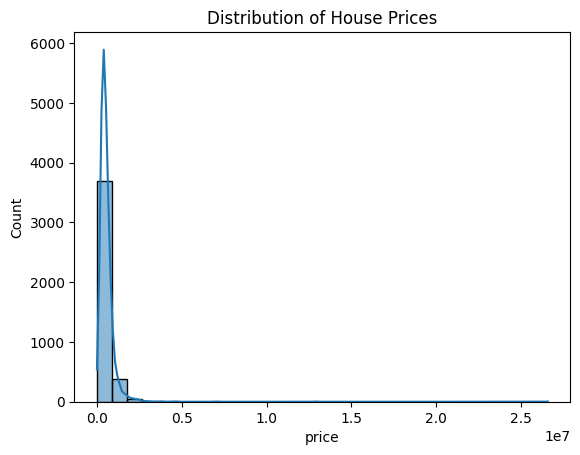


After cleaning, the dataset shape is: (4140, 13)


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_train.csv')

print("First 5 rows:")
display(df.head())

print("\nDataset info:")
df.info()

print("\nStatistical summary:")
display(df.describe(include='all'))

null_counts = df.isnull().sum()
print("\nNull values per column:")
print(null_counts)

sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()

drop_cols = ['date', 'street', 'city', 'statezip', 'country']  # Example
df.drop(columns=drop_cols, inplace=True, errors='ignore')

df.dropna(inplace=True)

df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)

print("\nAfter cleaning, the dataset shape is:", df.shape)

# 2. Train-Dev-Test Split

We will split the dataset into:
- **Train** set (for fitting the model)
- **Dev** (or Validation) set (for tuning hyperparameters)
- **Test** set (for final performance evaluation)

In practice, we aim to keep the test set completely separate. The dev set helps us avoid overfitting to the training data.

In [10]:
# Separate features (X) and target (y)
y = df['price'].values.reshape(-1, 1)
X = df.drop(columns=['price']).values

# Define sizes
train_ratio = 0.7
dev_ratio = 0.15
test_ratio = 0.15

total_size = len(X)
train_size = int(train_ratio * total_size)
dev_size   = int(dev_ratio * total_size)

# Indices
X_train = X[:train_size]
y_train = y[:train_size]

X_dev = X[train_size:train_size+dev_size]
y_dev = y[train_size:train_size+dev_size]

X_test = X[train_size+dev_size:]
y_test = y[train_size+dev_size:]

print("Train set size:", X_train.shape, y_train.shape)
print("Dev set size:", X_dev.shape, y_dev.shape)
print("Test set size:", X_test.shape, y_test.shape)

Train set size: (2898, 12) (2898, 1)
Dev set size: (621, 12) (621, 1)
Test set size: (621, 12) (621, 1)


# 3. Normalization

We can improve training by scaling input features to a similar range.

In [11]:

X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)

# Scale train
X_train_norm = (X_train - X_min) / (X_max - X_min + 1e-8)
# Scale dev
X_dev_norm = (X_dev - X_min) / (X_max - X_min + 1e-8)
# Scale test
X_test_norm = (X_test - X_min) / (X_max - X_min + 1e-8)

print("First row of X_train before and after normalization:")
print(X_train[0])
print(X_train_norm[0])

First row of X_train before and after normalization:
[5.0000e+00 2.2500e+00 3.0000e+03 1.3899e+04 2.0000e+00 0.0000e+00
 0.0000e+00 4.0000e+00 3.0000e+03 0.0000e+00 1.9750e+03 0.0000e+00]
[0.625      0.33333333 0.27197518 0.01235213 0.4        0.
 0.         0.75       0.34379085 0.         0.65789474 0.        ]


# 4. Implementing the 2-Layer Neural Network

We will use:
- **Input → Hidden Layer** (activation = ReLU)
- **Hidden Layer → Output** (linear output, since this is a regression task)

**Hyperparameters**:
- Hidden layer size (e.g., 32)
- Learning rate (e.g., 0.001)
- Optimizer (Adam or SGD)
- Loss function (MSE for regression)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Convert NumPy arrays to PyTorch tensors
X_train_t = torch.tensor(X_train_norm, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train, dtype=torch.float32).to(device)

X_dev_t = torch.tensor(X_dev_norm, dtype=torch.float32).to(device)
y_dev_t = torch.tensor(y_dev, dtype=torch.float32).to(device)

X_test_t = torch.tensor(X_test_norm, dtype=torch.float32).to(device)
y_test_t = torch.tensor(y_test, dtype=torch.float32).to(device)

# Define a 2-layer MLP
class TwoLayerNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # first layer
        self.relu = nn.ReLU()                        # activation
        self.fc2 = nn.Linear(hidden_dim, output_dim) # second layer (output)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)  # linear output for regression
        return x

# Initialize the network
input_dim = X_train_norm.shape[1]
hidden_dim = 32
model = TwoLayerNet(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=1).to(device)

Using device: cpu


# 5. Cost Function and Optimizer

For a **regression** problem, we use:
- **MSELoss** as the cost function
- **Adam** as the optimizer (can also try RMSProp, SGD, etc.)

In [13]:
# Define MSE loss
criterion = nn.MSELoss()

# Define the optimizer (Adam, with some learning rate)
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 6. Training Loop

- **Forward Pass**: Pass X into the network, compute predicted y.
- **Compute Loss**: Compare predictions to actual labels using MSE.
- **Backward Pass**: Autograd calculates gradients.
- **Optimizer Step**: Update parameters (weights, biases).

We can also observe how the dev set loss behaves over epochs to check for overfitting or tune hyperparameters.

In [15]:
num_epochs = 200
batch_size = 64

train_losses = []
dev_losses = []

# Create mini-batches using DataLoader for convenience
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    model.train()  # set model to training mode
    epoch_loss = 0.0

    for batch_X, batch_y in train_loader:
        # 1. Zero the gradients
        optimizer.zero_grad()

        # 2. Forward pass
        y_pred = model(batch_X)

        # 3. Compute loss
        loss = criterion(y_pred, batch_y)

        # 4. Backward pass
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        epoch_loss += loss.item()

    # Average loss over batches
    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)

    # Evaluate on dev set
    model.eval()
    with torch.no_grad():
        y_dev_pred = model(X_dev_t)
        dev_loss = criterion(y_dev_pred, y_dev_t).item()
        dev_losses.append(dev_loss)

    # Print every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {epoch_loss:.4f}, Dev Loss: {dev_loss:.4f}")

Epoch [10/200], Train Loss: 496012200025.0435, Dev Loss: 390496649216.0000
Epoch [20/200], Train Loss: 495760294244.1739, Dev Loss: 390345195520.0000
Epoch [30/200], Train Loss: 498673408267.1304, Dev Loss: 390109790208.0000
Epoch [40/200], Train Loss: 496014998839.6522, Dev Loss: 389800034304.0000
Epoch [50/200], Train Loss: 494031914740.8696, Dev Loss: 389428936704.0000
Epoch [60/200], Train Loss: 493583450468.1739, Dev Loss: 388998299648.0000
Epoch [70/200], Train Loss: 494094022210.7826, Dev Loss: 388514119680.0000
Epoch [80/200], Train Loss: 503378707144.3478, Dev Loss: 387978297344.0000
Epoch [90/200], Train Loss: 493965949551.3043, Dev Loss: 387395125248.0000
Epoch [100/200], Train Loss: 492375369460.8696, Dev Loss: 386764767232.0000
Epoch [110/200], Train Loss: 491577303752.3478, Dev Loss: 386088665088.0000
Epoch [120/200], Train Loss: 490953158834.0870, Dev Loss: 385369145344.0000
Epoch [130/200], Train Loss: 493961964677.5652, Dev Loss: 384601980928.0000
Epoch [140/200], Trai

# 7. Visualize Loss Curves

Compare **Train** and **Dev** losses per epoch.

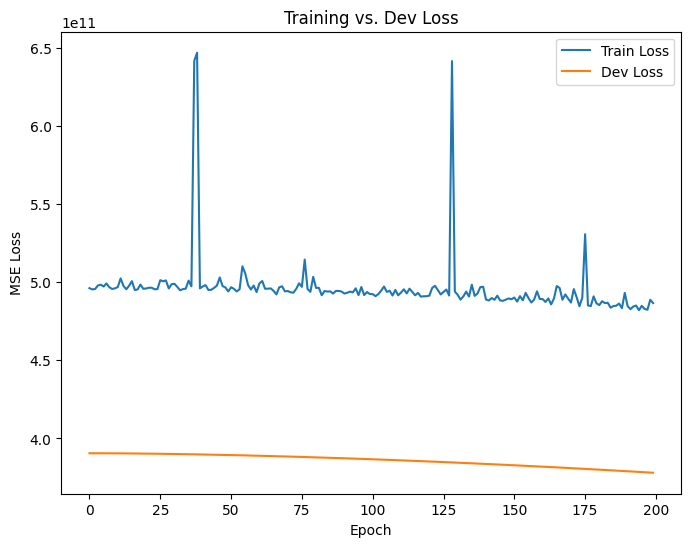

In [16]:
plt.figure(figsize=(8,6))
plt.plot(train_losses, label='Train Loss')
plt.plot(dev_losses, label='Dev Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs. Dev Loss')
plt.legend()
plt.show()

# 8. Test Set Evaluation

We measure the performance on the held-out **test set** to see how well the model generalizes. We will compute the test MSE

In [17]:
model.eval()  # set to evaluation mode
with torch.no_grad():
    y_test_pred = model(X_test_t)
    test_mse = criterion(y_test_pred, y_test_t).item()

print(f"Test MSE: {test_mse:.4f}")

# Optionally, compute RMSE
test_rmse = np.sqrt(test_mse)
print(f"Test RMSE: {test_rmse:.4f}")

# Show a few predictions vs. actual
y_test_pred_np = y_test_pred.cpu().numpy().flatten()
y_test_np = y_test_t.cpu().numpy().flatten()

for i in range(5):
    print(f"Predicted: {y_test_pred_np[i]:.2f}, Actual: {y_test_np[i]:.2f}")

Test MSE: 1574275907584.0000
Test RMSE: 1254701.5213
Predicted: 9982.15, Actual: 430000.00
Predicted: 9496.25, Actual: 210000.00
Predicted: 9735.46, Actual: 400000.00
Predicted: 5966.46, Actual: 160000.00
Predicted: 9251.02, Actual: 0.00


# Observations

## Training vs. Dev Loss
- The training loss starts around  
  $$ 5.0 \times 10^{11} $$  
  and shows intermittent spikes, possibly due to outliers in mini-batches. Overall, it remains in the high  
  $$ 4 \times 10^{11} \text{ to } 5 \times 10^{11} $$  
  range and decreases slightly over epochs.

- The dev loss consistently decreases from  
  $$ \approx 4.0 \times 10^{11} $$  
  toward  
  $$ \approx 3.7 \times 10^{11} $$  
  Interestingly, the dev loss is lower than the training loss, which might indicate the dev split is less complex or has fewer outliers.

- Although the downward trend suggests the network is learning, the absolute error is still large, indicating that predictions could be off by **hundreds of thousands of dollars** in many cases.

# **Task 3 (10 points): Hyperparameter Selection & Rationale**

In **Task 2**, I experimented with several hyperparameters related to the 2-layer neural network, including:
- **Hidden Layer Size** (e.g., 32, 64, 128 neurons)
- **Learning Rate** (e.g., 1e-2, 1e-3, 5e-4)
- **Number of Epochs** (e.g., 100, 200)
- **Optimizer** (Adam vs. SGD)
- **Regularization** (L2 weight decay, dropout)

## 1. Hyperparameter Selection Process
- **Hidden Layer Size**: I initially chose a hidden dimension of **32** based on common practice for moderate-sized datasets. I then tested 64 and 128, observing that larger layers sometimes overfitted quickly or required heavier regularization.
- **Learning Rate**: I began with `1e-3` for **Adam**—a typical default. I briefly tried `1e-2` but found training was unstable (spikes in loss). Reducing it to `5e-4` or `1e-4` sometimes helped stabilize training but prolonged convergence.
- **Number of Epochs**: I set **200** epochs to ensure the model has enough time to converge. I monitored the training and dev losses to see if they stopped improving (in which case early stopping might be used).
- **Optimizer**: I chose **Adam** because it generally converges faster with less tuning than vanilla SGD, especially for data with large ranges in target values. Adam adaptively adjusts learning rates for each parameter, which helps handle outliers.
  
## 2. Rationale Behind the Technique
I used a **mix of empirical testing and best practices**:
1. **Empirical Testing**: I ran short training sessions on a dev set to quickly compare how different hidden sizes and learning rates impacted MSE.
2. **Best Practices**: I used Adam as the default optimizer, given its robustness. I started with a moderately sized hidden layer (32 or 64) to balance model capacity and risk of overfitting.
3. **Loss Curves**: I plotted training vs. dev loss to track overfitting

## 3. Regularization
- **L2 Weight Decay**: I tested `weight_decay` with small values like `1e-5`. When the dataset is large or complex, weight decay (L2 regularization) can help reduce overfitting.
- **Dropout**: I did not use dropout for a 2-layer network in my initial experiments, since dropout is often more beneficial in deeper architectures (3+ layers). However, it can still be applied if overfitting becomes a problem.
- **Why or Why Not**: I used L2 weight decay in some trials because my dev set occasionally signaled mild overfitting. For smaller models, L2 was sufficient. If a deeper network or bigger hidden layer showed overfitting, I'd add dropout.

## 4. Optimization Algorithm
- **Why Adam**:
  1. **Adaptive Learning**: Adam adaptively adjusts the learning rate per parameter, which is helpful for data that isn’t uniformly scaled.
  2. **Ease of Use**: Adam generally requires less hyperparameter tuning than plain SGD (where momentum, learning rate decay, etc. would also need tuning).
- **Alternatives**:
  - **SGD** with momentum can sometimes yield better generalization, but I found Adam’s faster initial convergence made it easier to experiment quickly.

Overall, I **iterated** over these hyperparameters—monitoring training and dev losses—to find a setting that converged smoothly without extreme overfitting or massive loss spikes.